In [1]:
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

The code below uses samples that all have the same masses/energy but different displacements. This serves to analyze the effect of a different displacement on the 4 plots

In [2]:
samples1 = [
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_0p25GeV_1mm",
    "2Mu2E_1000GeV_0p25GeV_2mm"   
]

samples2 = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm",
    "2Mu2E_100GeV_0p25GeV_2mm"
]

samples3 = [
    "2Mu2E_150GeV_0p25GeV_0p013mm",
    "2Mu2E_150GeV_0p25GeV_0p13mm",
    "2Mu2E_150GeV_0p25GeV_13mm",
    "2Mu2E_150GeV_0p25GeV_1p3mm",
    "2Mu2E_150GeV_0p25GeV_6p7mm"
]

samples=samples2
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels1 = [
    "barrelpho",
    "barrelpho_matched",
    "loosebarrelpho",
    "looseBarrelpho_matched"
]

channels2 = [
    "pvAndCosmic_cuts",
    "baseNoLj",
    "base"
]

channels=channels1
    
p = sidm_processor.SidmProcessor(
    channels,
    ["photon_id"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  barrelpho
Not applying any cuts to the lepton jets for channel  barrelpho_matched
Not applying any cuts to the lepton jets for channel  loosebarrelpho
Not applying any cuts to the lepton jets for channel  looseBarrelpho_matched
Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this JaggedSelection.   electrons :  pT > 20 GeV
Not applying any cuts to the lepton jets for channel  barrelpho
Not applying any cuts to the lepton jets for channel  barrelpho_matched
Not applying any cuts to the lepton jets for channel  loosebarrelpho
Not applying any cuts to the lepton jets for channel  looseBarrelpho_matched
Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this JaggedSelection.   electrons :  pT > 20 GeV
Not applying any cuts to the lepton jets for channel  barrelpho
Not applying any cuts to the lepton jets for channel  barr

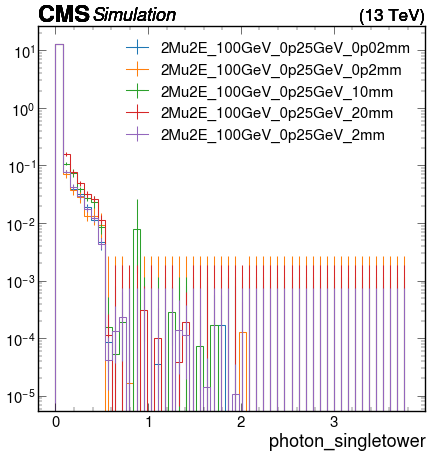

In [3]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale('log')

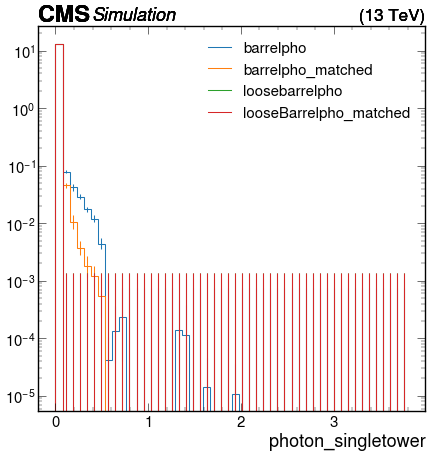

In [4]:
for channel in channels:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channel, :], density=True, flow=None, label=sample)
    plt.legend(channels)
plt.yscale("log")

looseBarrelpho and looseBarrelpho_matched seem to be the same. The only difference in the dR cut, which must not make much of a difference.

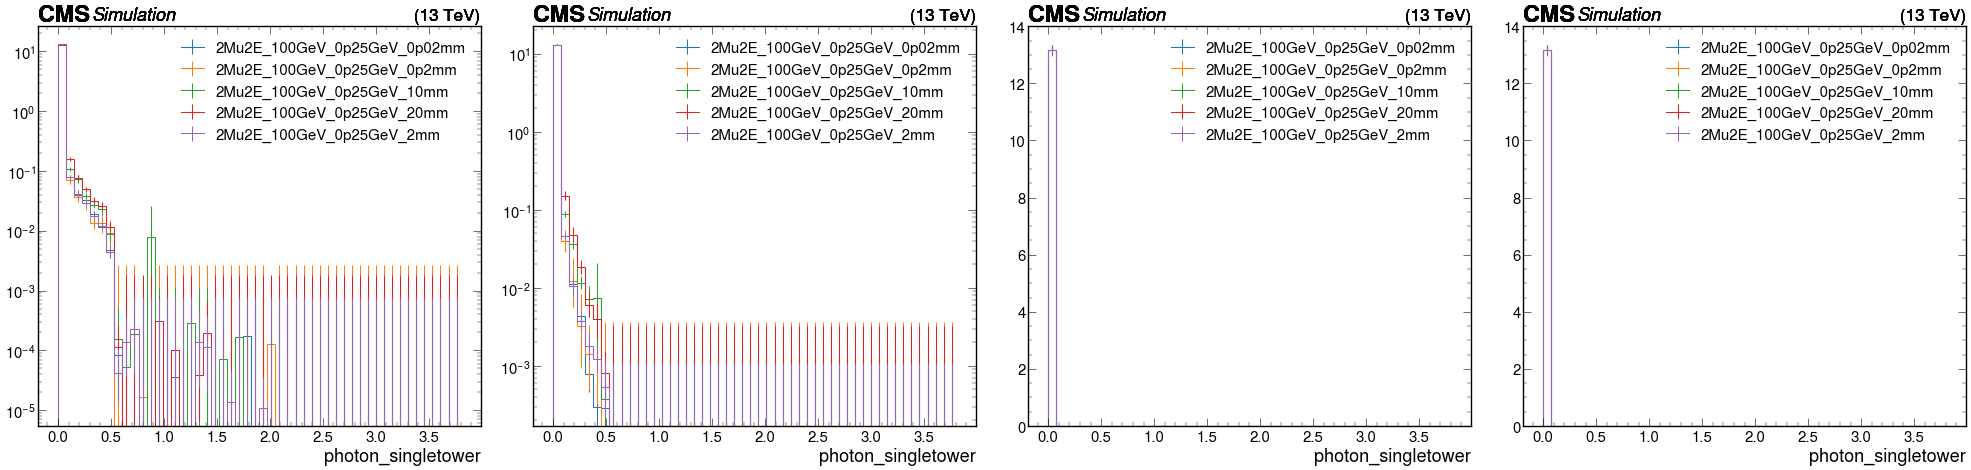

In [5]:
plt.subplots(1, 4, figsize=(40, 10))
plt.subplot(1, 4, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(1, 4, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[1], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(1, 4, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[2], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.subplot(1, 4, 4)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[3], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.tight_layout()

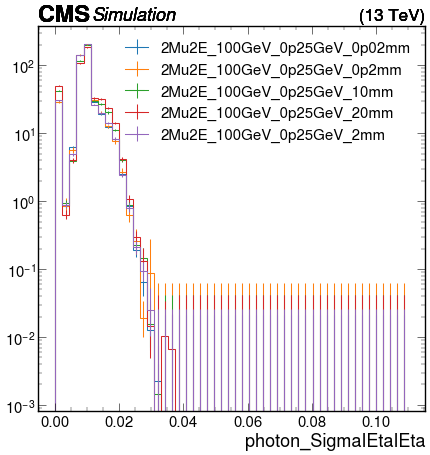

In [6]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[0], :], density=True, flow=None, label=sample)
plt.yscale('log')
plt.legend()

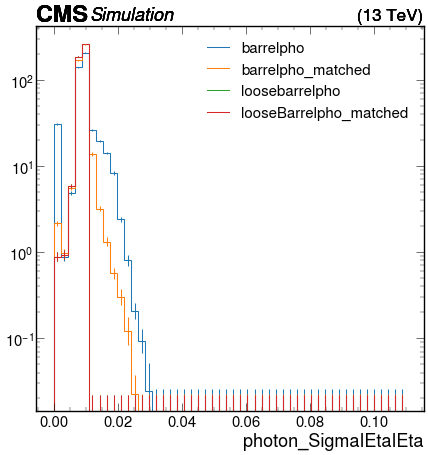

In [7]:
for channel in channels:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channel, :], density=True)
    plt.legend(channels)
plt.yscale("log")

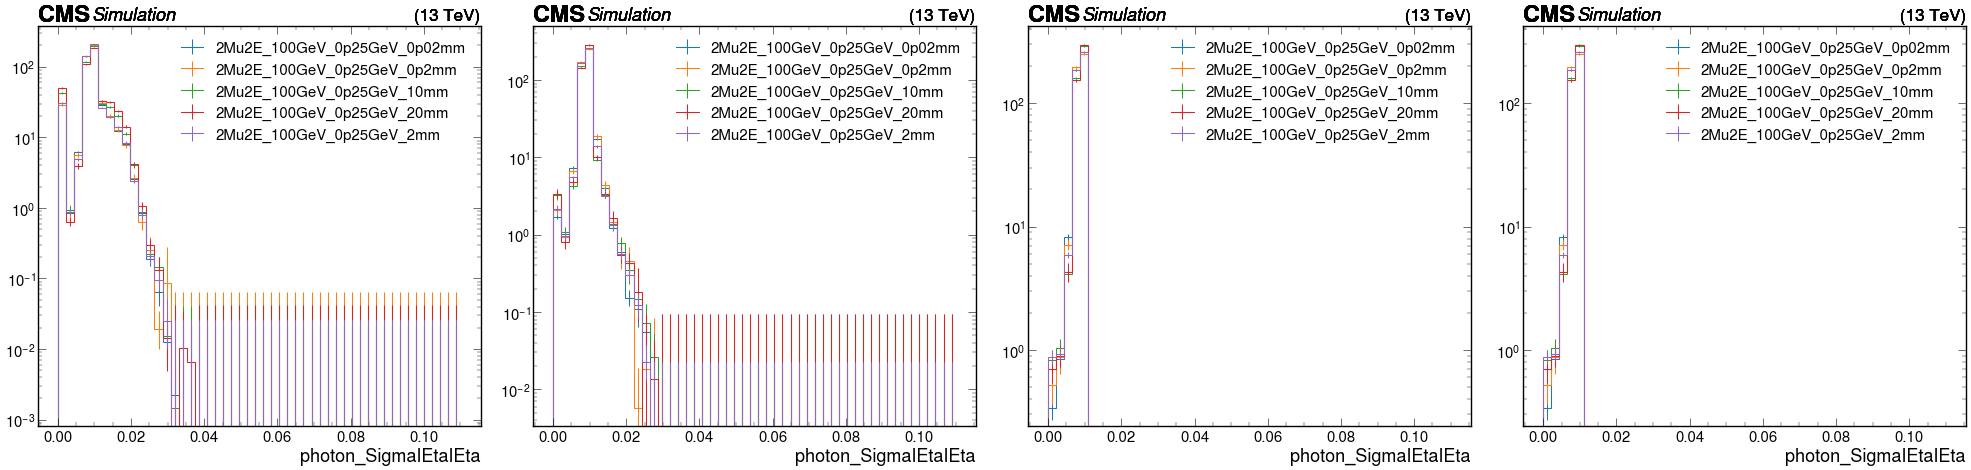

In [8]:
plt.subplots(1, 4, figsize=(40, 10))
plt.subplot(1, 4, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(1, 4, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[1], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(1, 4, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[2], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(1, 4, 4)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[3], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.tight_layout()

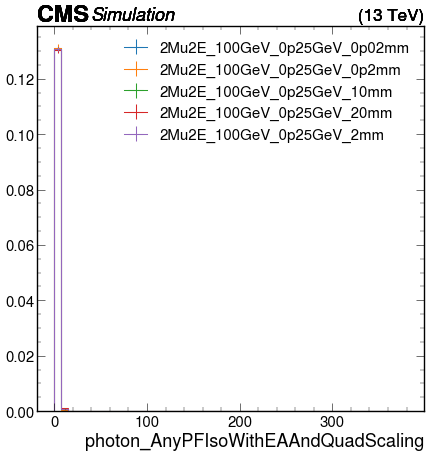

In [9]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale('log')

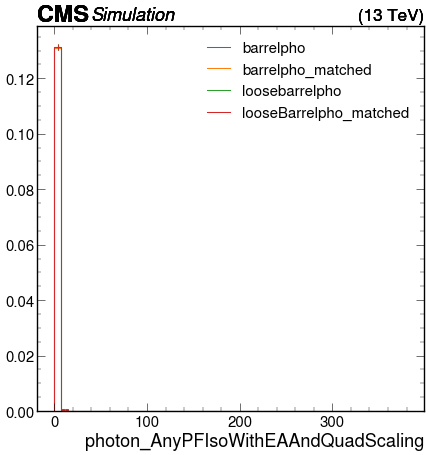

In [10]:
for channel in channels:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channel, :], density=True, flow=None)
    plt.legend(channels)
#plt.yscale("log")

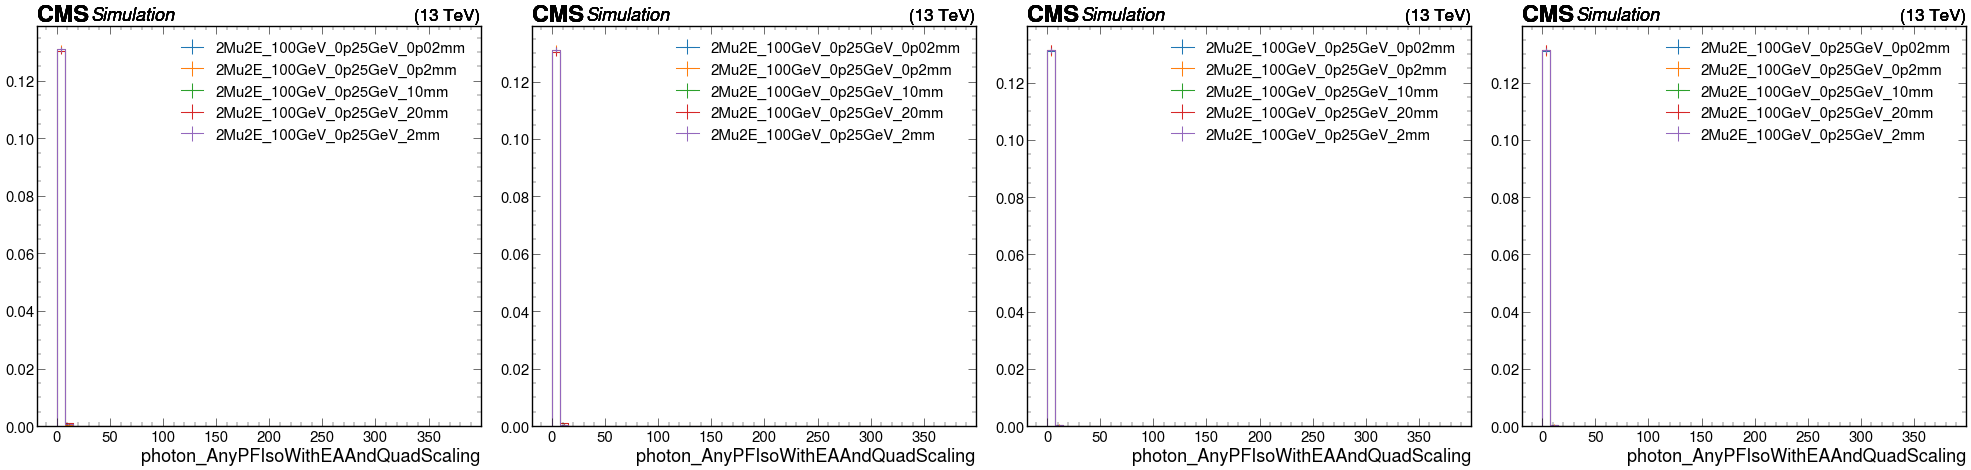

In [11]:
plt.subplots(1, 4, figsize=(40, 10))
plt.subplot(1, 4, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.subplot(1, 4, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[1], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.subplot(1, 4, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[2], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.subplot(1, 4, 4)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[3], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.tight_layout()

In [12]:
utilities.plot(out["2Mu2E_1000GeV_0p25GeV_0p002mm"]["hists"]["photon_AnyPFIsoWithEACut"][channels[0], :], density=True)

KeyError: '2Mu2E_1000GeV_0p25GeV_0p002mm'

AnyPFIsoWithEA doesn't work

In [ ]:
print(channels)